In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from plasmistry.electron import EEDF
from plasmistry.electron import get_maxwell_eedf
np.set_printoptions(precision=1, linewidth=130, edgeitems=5)

In [2]:
crostn_energy = np.linspace(0,10)
crostn = np.ones_like(crostn_energy)*1e-20
threshold = 5
crostn[crostn_energy<5] = 0
inelas_df = pd.DataFrame(dict(reaction=["E + H2 => E + H2(v1)",], 
                             type=["excitation",],
                             threshold_eV=[5,],
                             cross_section=[np.vstack((crostn_energy, crostn)),]))
inelas_df

,reaction,type,threshold_eV,cross_section
0,E + H2 => E + H2(v1),excitation,5,"[[0.0, 0.20408163265306123, 0.4081632653061224..."


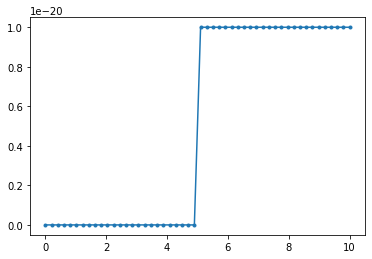

In [3]:
_cs = inelas_df.at[0, "cross_section"]
plt.plot(_cs[0],_cs[1], marker='.')

# Creation
##     *parameters*
* **max_energy_eV** : *number*
* **grid_number** : *number*

In [4]:
eedf = EEDF(max_energy_eV=10, grid_number=200)

# initialize
## *parameters*
* **rctn_with_crostn_df** : *data frame*
* **total_species** : *list*

In [5]:
eedf.initialize(rctn_with_crostn_df=inelas_df, total_species=['E', 'H2'])

# Set parameters
* **E** : *float*
* **Tgas** : *float*
* **N** : *float*

In [6]:
eedf.set_parameters(E=100, Tgas=1000, N=1e20)

# See the rate const matrix of electron

In [7]:
eedf.rate_const_matrix_e_inelas_electron.toarray()

array([[ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ..., -1.9e-14,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00, -1.9e-14,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00, -1.9e-14,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.

In [8]:
eedf.rate_const_matrix_e_inelas_electron.shape

(200, 200)

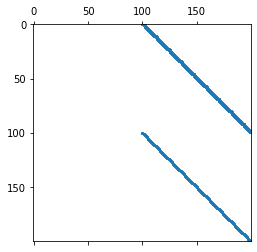

In [9]:
plt.spy(eedf.rate_const_matrix_e_inelas_electron, markersize=2)

# See the rate const matrix of molecule

In [10]:
eedf.rate_const_matrix_e_inelas_molecule

array([[0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 6.6e-35, 9.3e-35, 1.1e-34, 1.1e-34,


In [11]:
eedf.rate_const_matrix_e_inelas_molecule.shape

(1, 200)

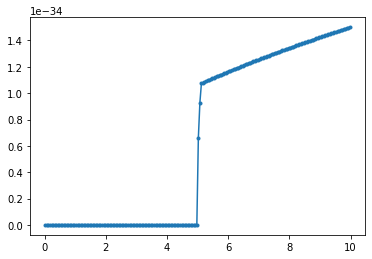

In [12]:
plt.plot(eedf.energy_point_eV, eedf.rate_const_matrix_e_inelas_molecule[0], marker='.')

# See the eedf properties

In [13]:
eedf.set_density_per_J(get_maxwell_eedf(eedf.energy_point, Te_eV=3.0))

In [14]:
eedf.set_flux(total_species_density=np.array([1,1]))

In [15]:
eedf.J_flux_ee

array([ 0.0e+00,  8.5e-28,  0.0e+00,  1.0e-26,  6.8e-27, -1.4e-26,  4.1e-26,  5.5e-26, -5.5e-26, -2.7e-26,  6.8e-26,  2.7e-26,
        2.7e-26,  1.1e-25, -1.4e-25,  8.2e-26,  8.2e-26,  2.2e-25,  1.1e-25, -2.2e-25, -2.7e-25,  1.6e-25,  3.8e-25, -1.1e-25,
       -1.6e-25,  5.5e-26,  0.0e+00,  0.0e+00,  2.7e-25, -2.2e-25,  0.0e+00, -1.1e-25,  0.0e+00, -1.6e-25, -5.5e-26,  0.0e+00,
       -5.5e-26,  1.1e-25, -1.6e-25, -5.5e-26, -1.6e-25,  1.6e-25, -5.5e-26,  5.5e-26,  4.9e-25, -2.2e-25,  1.1e-25, -4.4e-25,
       -1.6e-25,  2.7e-25,  0.0e+00, -1.6e-25, -4.9e-25, -1.6e-25, -1.6e-25,  2.7e-25, -1.6e-25,  3.3e-25, -1.1e-25, -1.6e-25,
       -5.5e-25,  1.1e-25, -3.8e-25, -1.6e-25,  4.9e-25, -6.5e-25,  6.0e-25, -2.7e-25,  0.0e+00,  6.0e-25,  5.5e-26,  5.5e-26,
        1.6e-25, -2.2e-25, -3.3e-25, -5.5e-26,  1.1e-25,  1.6e-25, -3.8e-25, -1.1e-25,  2.7e-25, -1.6e-25, -1.6e-25,  5.5e-26,
        2.7e-25, -1.1e-25, -1.1e-25,  1.1e-25,  0.0e+00, -2.2e-25, -2.7e-25, -1.1e-25,  1.6e-25,  0.0e+00,  5.5

In [16]:
print(eedf)


        
        
     NUMBER OF DISCRETIZED CELLS : 200 cells
        
               ENERGY SPACE (eV) : (0.0, 10.0)
        
            ENERGY INTERVAL (eV) : 0.050 
        
        
            ELECTRON TEMPERATURE : 2.466 eV
        
                ELECTRON DENSITY : 9.16e-01 m^-3
        
        
              ELECTRIC FIELD (E) : 100 V/m
        
          GAS TEMPERATURE (Tgas) : 1000 K
        
 BACKGROUND MOLECULE DENSITY (N) : 1.0e+20 m^-3
        
    REDUCED ELECTRIC FIELD (E/N) : 1000.0 Td
        
        
     ELASTIC COLLISION MOLECULES : ['H2']
        
   INELASTIC COLLISION MOLECULES : ['H2']
        


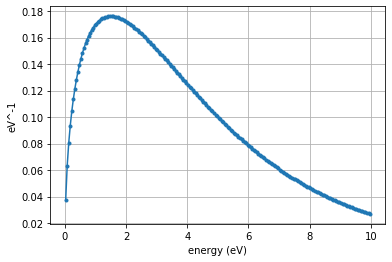

In [17]:
eedf.plot_normalized_eedf()

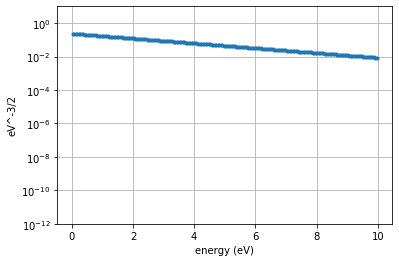

In [18]:
eedf.plot_normalized_eepf()

In [19]:
eedf._get_electron_rate_e_inelas(density=np.array([1,1]))

array([ 4710. ,  6519.5,  7463.8,  7412.1,  7360. ,  7307.6,  7255. ,  7202. ,  7148.9,  7095.5,  7042. ,  6988.3,  6934.4,
        6880.4,  6826.3,  6772.1,  6717.8,  6663.5,  6609.1,  6554.8,  6500.4,  6446. ,  6391.6,  6337.3,  6283. ,  6228.8,
        6174.6,  6120.6,  6066.6,  6012.8,  5959.1,  5905.5,  5852. ,  5798.8,  5745.6,  5692.7,  5639.9,  5587.3,  5534.9,
        5482.7,  5430.8,  5379. ,  5327.5,  5276.2,  5225.2,  5174.4,  5123.8,  5073.5,  5023.5,  4973.7,  4924.2,  4875. ,
        4826.1,  4777.5,  4729.1,  4681. ,  4633.3,  4585.8,  4538.6,  4491.8,  4445.2,  4399. ,  4353.1,  4307.5,  4262.2,
        4217.2,  4172.6,  4128.3,  4084.3,  4040.6,  3997.3,  3954.3,  3911.6,  3869.2,  3827.2,  3785.5,  3744.2,  3703.1,
        3662.4,  3622.1,  3582.1,  3542.4,  3503. ,  3464. ,  3425.3,  3386.9,  3348.9,  3311.2,  3273.9,  3236.8,  3200.1,
        3163.8,  3127.7,  3092. ,  3056.6,  3021.5,  2986.8,  2952.4,  2918.3,  2884.5, -4710. , -6519.5, -7463.8, -7412.1,
       -

# time evolution
## function
* **solve_ivp** : BDF method

In [20]:
total_species_density = np.array([1,1])*1e25
def dndt(t, y):
    eedf.set_density_per_J(y)
    print(t)
    return eedf._get_electron_rate_e_inelas(density=total_species_density)

def dndt_ef(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    print(t)
    return eedf._get_deriv_ef()

def dndt_el(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    print(t)
    return eedf._get_deriv_el()

def dndt_ee(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    print(t)
    return eedf._get_deriv_ee()

def dndt_all(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    print(t)
    return eedf.get_deriv_total(total_species_density=total_species_density)  

In [21]:
y0 = eedf.density_per_J
sol = solve_ivp(dndt, [0,10],y0, method="BDF")

0.0
8.027406362987505e-14
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

2.942411504345722e-10
2.942411504345722e-10
2.965019642863993e-10
2.965019642863993e-10
2.9876277813822643e-10
2.9876277813822643e-10
3.0102359199005353e-10
3.0102359199005353e-10
3.0328440584188063e-10
3.0328440584188063e-10
3.0554521969370774e-10
3.0554521969370774e-10
3.0780603354553484e-10
3.0780603354553484e-10
3.1013842504278777e-10
3.1013842504278777e-10
3.124708165400407e-10
3.124708165400407e-10
3.148032080372936e-10
3.148032080372936e-10
3.1713559953454655e-10
3.1713559953454655e-10
3.194679910317995e-10
3.194679910317995e-10
3.2192972702226486e-10
3.2192972702226486e-10
3.2439146301273023e-10
3.2439146301273023e-10
3.268531990031956e-10
3.268531990031956e-10
3.29314934993661e-10
3.29314934993661e-10
3.3177667098412637e-10
3.3177667098412637e-10
3.343561870285617e-10
3.343561870285617e-10
3.36935703072997e-10
3.36935703072997e-10
3.3951521911743234e-10
3.3951521911743234e-10
3.4209473516186767e-10
3.4209473516186767e-10
3.44674251206303e-10
3.44674251206303e-10
3.475280580517

In [22]:
sol.t

array([0.0e+00, 2.2e-14, 4.4e-14, 2.7e-13, 4.9e-13, 1.2e-12, 1.9e-12, 2.7e-12, 4.0e-12, 5.4e-12, 6.8e-12, 8.1e-12, 1.0e-11,
       1.2e-11, 1.4e-11, 1.5e-11, 1.7e-11, 1.9e-11, 2.1e-11, 2.3e-11, 2.5e-11, 2.7e-11, 2.8e-11, 3.0e-11, 3.2e-11, 3.4e-11,
       3.5e-11, 3.7e-11, 3.9e-11, 4.1e-11, 4.2e-11, 4.4e-11, 4.6e-11, 4.8e-11, 5.0e-11, 5.1e-11, 5.3e-11, 5.5e-11, 5.7e-11,
       5.8e-11, 6.0e-11, 6.2e-11, 6.4e-11, 6.6e-11, 6.8e-11, 7.0e-11, 7.1e-11, 7.3e-11, 7.5e-11, 7.7e-11, 7.9e-11, 8.0e-11,
       8.2e-11, 8.4e-11, 8.6e-11, 8.7e-11, 8.9e-11, 9.1e-11, 9.3e-11, 9.4e-11, 9.6e-11, 9.8e-11, 1.0e-10, 1.0e-10, 1.0e-10,
       1.1e-10, 1.1e-10, 1.1e-10, 1.1e-10, 1.1e-10, 1.1e-10, 1.2e-10, 1.2e-10, 1.2e-10, 1.2e-10, 1.2e-10, 1.2e-10, 1.3e-10,
       1.3e-10, 1.3e-10, 1.3e-10, 1.3e-10, 1.3e-10, 1.4e-10, 1.4e-10, 1.4e-10, 1.4e-10, 1.4e-10, 1.4e-10, 1.5e-10, 1.5e-10,
       1.5e-10, 1.5e-10, 1.5e-10, 1.5e-10, 1.6e-10, 1.6e-10, 1.6e-10, 1.6e-10, 1.6e-10, 1.6e-10, 1.7e-10, 1.7e-10, 1.7e-10,
       1

In [23]:
sol.y

array([[ 2.1e+017,  2.1e+017,  2.1e+017,  2.2e+017,  2.3e+017, ...,  7.8e+017,  7.8e+017,  7.8e+017,  7.8e+017,  7.8e+017],
       [ 3.6e+017,  3.6e+017,  3.6e+017,  3.8e+017,  3.9e+017, ...,  9.2e+017,  9.2e+017,  9.2e+017,  9.2e+017,  9.2e+017],
       [ 4.6e+017,  4.6e+017,  4.6e+017,  4.8e+017,  4.9e+017, ...,  1.0e+018,  1.0e+018,  1.0e+018,  1.0e+018,  1.0e+018],
       [ 5.3e+017,  5.4e+017,  5.4e+017,  5.5e+017,  5.7e+017, ...,  1.1e+018,  1.1e+018,  1.1e+018,  1.1e+018,  1.1e+018],
       [ 6.0e+017,  6.0e+017,  6.0e+017,  6.2e+017,  6.3e+017, ...,  1.1e+018,  1.1e+018,  1.1e+018,  1.1e+018,  1.1e+018],
       ...,
       [ 1.6e+017,  1.6e+017,  1.6e+017,  1.6e+017,  1.5e+017, ..., -1.2e-081, -6.4e-091,  6.6e-093,  3.6e-103, -3.5e-105],
       [ 1.6e+017,  1.6e+017,  1.6e+017,  1.5e+017,  1.5e+017, ..., -1.0e-081, -5.1e-091,  5.4e-093,  2.9e-103, -2.8e-105],
       [ 1.6e+017,  1.6e+017,  1.6e+017,  1.5e+017,  1.4e+017, ..., -8.3e-082, -4.1e-091,  4.3e-093,  2.3e-103, -2.3e-10

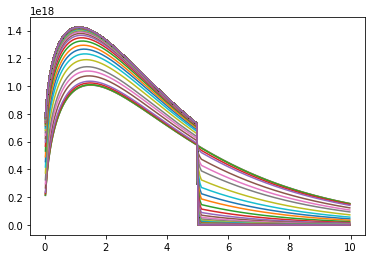

In [24]:
plt.plot(eedf.energy_point_eV, sol.y)

In [25]:
print(f"y: shape {sol.y.shape}, t: shape {sol.t.shape}")

y: shape (200, 285), t: shape (285,)


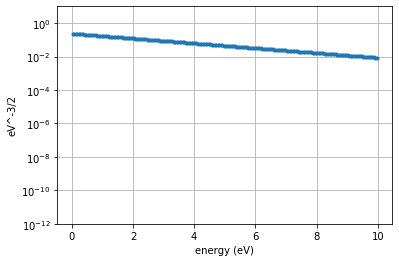

In [26]:
eedf.set_density_per_J(sol.y[:,0])
eedf.plot_normalized_eepf()

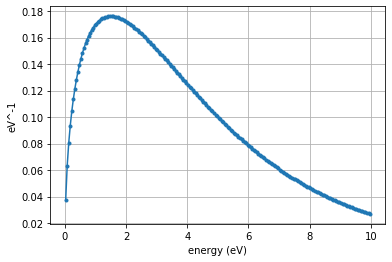

In [27]:
eedf.plot_normalized_eedf()

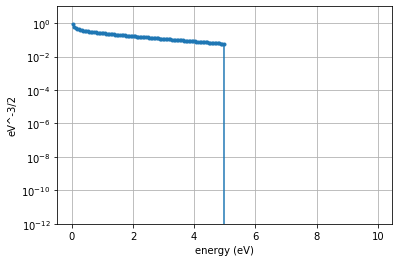

In [28]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf()

###  -*electric field*- effect only

In [29]:
y0 = eedf.density_per_J
sol = solve_ivp(dndt_ef, [0,10],y0, method="BDF")

0.0
8.434470277395616e-34
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.434470277395616e-32
8.434470277395616e-32
1.6868940554791232e-31
1.6868940554791232e-31
1.0121364332874739e-30
1.0121364332874739e-30
1.8555834610270356e-30
1.855583461

9.654112387499979e-11
9.654112387499979e-11
9.821483062846355e-11
9.821483062846355e-11
1.0003727094526652e-10
1.0003727094526652e-10
1.018597112620695e-10
1.018597112620695e-10
1.0368215157887247e-10
1.0368215157887247e-10
1.0550459189567545e-10
1.0550459189567545e-10
1.0732703221247843e-10
1.0732703221247843e-10
1.091494725292814e-10
1.091494725292814e-10
1.1113154985944587e-10
1.1113154985944587e-10
1.1311362718961034e-10
1.1311362718961034e-10
1.1509570451977481e-10
1.1509570451977481e-10
1.1707778184993928e-10
1.1707778184993928e-10
1.1905985918010374e-10
1.1905985918010374e-10
1.210419365102682e-10
1.210419365102682e-10
1.23195277304916e-10
1.23195277304916e-10
1.2534861809956378e-10
1.2534861809956378e-10
1.2750195889421156e-10
1.2750195889421156e-10
1.2965529968885934e-10
1.2965529968885934e-10
1.3180864048350713e-10
1.3180864048350713e-10
1.339619812781549e-10
1.339619812781549e-10
1.3629902872747254e-10
1.3629902872747254e-10
1.3863607617679017e-10
1.3863607617679017e-10
1.40

1.1035496439463972
2.0064535046455987
2.0064535046455987
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.

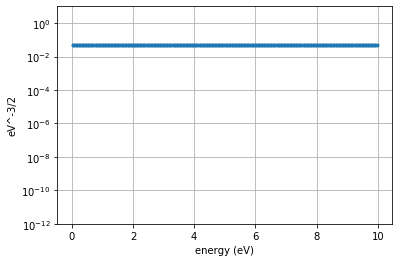

In [30]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf()

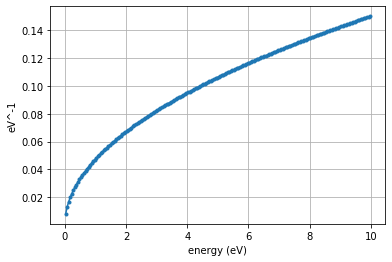

In [31]:
eedf.plot_normalized_eedf()

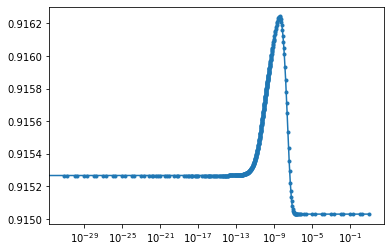

In [32]:
Te_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_temperature_in_eV)
plt.semilogx(sol.t, Te_seq, marker='.')

### -*elastic collision*- effect only

In [33]:
y0 = get_maxwell_eedf(eedf.energy_point, Te_eV=1.0)
sol = solve_ivp(dndt_el, [0,10],y0, method="BDF")

0.0
1.2337615216194405e-07
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.180591000703875e-09
6.180591000703875e-09
1.236118200140775e-08
1.236118200140775e-08
7.41670920084465e-08
7.41670920084465e-08
1.3597300201548525e-07
1.35973002015485

0.0007192060083027918
0.000736608499077622
0.000736608499077622
0.0007540109898524522
0.0007540109898524522
0.0007783448633863569
0.0007783448633863569
0.0008026787369202616
0.0008026787369202616
0.0008270126104541663
0.0008270126104541663
0.000851346483988071
0.000851346483988071
0.0008756803575219757
0.0008756803575219757
0.0009099348599290174
0.0009099348599290174
0.0009441893623360591
0.0009441893623360591
0.0009784438647431008
0.0009784438647431008
0.0010126983671501426
0.0010126983671501426
0.0010469528695571844
0.0010469528695571844
0.0010959868705539058
0.0010959868705539058
0.0011450208715506273
0.0011450208715506273
0.0011940548725473488
0.0011940548725473488
0.0012430888735440702
0.0012430888735440702
0.0012921228745407917
0.0012921228745407917
0.001364728159343306
0.001364728159343306
0.0014373334441458204
0.0014373334441458204
0.0015099387289483348
0.0015099387289483348
0.0015825440137508492
0.0015825440137508492
0.0016551492985533635
0.0016551492985533635
0.00176836870311

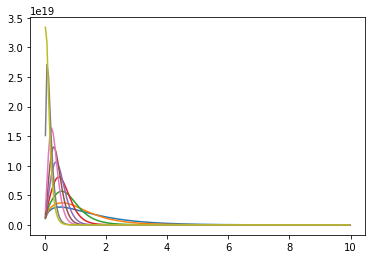

In [34]:
plt.plot(eedf.energy_point_eV, sol.y[:,::40])

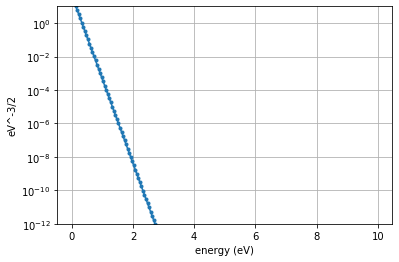

In [35]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf()

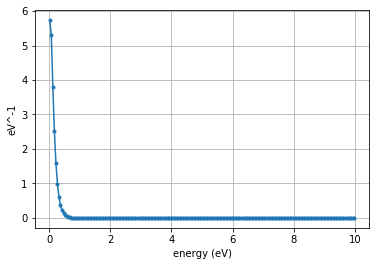

In [36]:
eedf.plot_normalized_eedf()

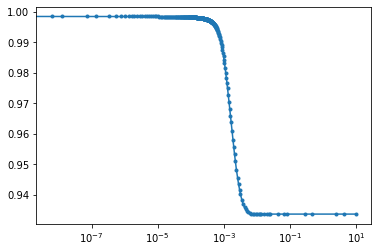

In [37]:
Te_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_density)
plt.semilogx(sol.t, Te_seq, marker='.')

### -*electron collisions*- only

In [38]:
y0 = 1e20 * get_maxwell_eedf(eedf.energy_point, Te_eV=1.0)
y0[eedf.energy_point_eV>2] = 1e-30
sol = solve_ivp(dndt_ee, [0,1e3],y0, method="BDF")

0.0
7.166965890426709e-55
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.166965890426709e-53
7.166965890426709e-53
1.4333931780853418e-52
1.4333931780853418e-52
8.60035906851205e-52
8.60035906851205e-52
1.5767324958938758e-51
1.5767324958938

7.070985171059402e-14
7.070985171059402e-14
7.357837602050986e-14
7.357837602050986e-14
7.64469003304257e-14
7.64469003304257e-14
7.931542464034153e-14
7.931542464034153e-14
8.218394895025737e-14
8.218394895025737e-14
8.505247326017321e-14
8.505247326017321e-14
8.850824411796603e-14
8.850824411796603e-14
9.196401497575884e-14
9.196401497575884e-14
9.541978583355166e-14
9.541978583355166e-14
9.887555669134448e-14
9.887555669134448e-14
1.023313275491373e-13
1.023313275491373e-13
1.0578709840693011e-13
1.0578709840693011e-13
1.0987589306140764e-13
1.0987589306140764e-13
1.1396468771588518e-13
1.1396468771588518e-13
1.1805348237036273e-13
1.1805348237036273e-13
1.2214227702484027e-13
1.2214227702484027e-13
1.262310716793178e-13
1.262310716793178e-13
1.3031986633379535e-13
1.3031986633379535e-13
1.3517426449956606e-13
1.3517426449956606e-13
1.4002866266533676e-13
1.4002866266533676e-13
1.4488306083110746e-13
1.4488306083110746e-13
1.4973745899687817e-13
1.4973745899687817e-13
1.545918571626

1.3553176846936426e-11
1.3553176846936426e-11
1.3726703336848848e-11
1.3726703336848848e-11
1.390022982676127e-11
1.390022982676127e-11
1.4073756316673693e-11
1.4073756316673693e-11
1.4247282806586115e-11
1.4247282806586115e-11
1.4420809296498537e-11
1.4420809296498537e-11
1.460469144313424e-11
1.460469144313424e-11
1.4788573589769946e-11
1.4788573589769946e-11
1.497245573640565e-11
1.497245573640565e-11
1.5156337883041355e-11
1.5156337883041355e-11
1.534022002967706e-11
1.534022002967706e-11
1.5524102176312764e-11
1.5524102176312764e-11
1.5718842949578498e-11
1.5718842949578498e-11
1.591358372284423e-11
1.591358372284423e-11
1.6108324496109965e-11
1.6108324496109965e-11
1.63030652693757e-11
1.63030652693757e-11
1.6497806042641433e-11
1.6497806042641433e-11
1.6692546815907167e-11
1.6692546815907167e-11
1.6898598700577572e-11
1.6898598700577572e-11
1.7104650585247978e-11
1.7104650585247978e-11
1.7310702469918383e-11
1.7310702469918383e-11
1.7516754354588788e-11
1.7516754354588788e-11
1.

1.485450977263429e-10
1.49795558388321e-10
1.49795558388321e-10
1.510460190502991e-10
1.510460190502991e-10
1.5229647971227718e-10
1.5229647971227718e-10
1.5354694037425528e-10
1.5354694037425528e-10
1.548546830539345e-10
1.548546830539345e-10
1.5616242573361375e-10
1.5616242573361375e-10
1.5747016841329298e-10
1.5747016841329298e-10
1.5877791109297221e-10
1.5877791109297221e-10
1.6008565377265145e-10
1.6008565377265145e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-10
1.6139339645233068e-

2.3269057294145067e-09
2.4745015468793898e-09
2.4745015468793898e-09
2.622097364344273e-09
2.622097364344273e-09
2.896583020282576e-09
2.896583020282576e-09
3.1710686762208788e-09
3.1710686762208788e-09
3.4455543321591817e-09
3.4455543321591817e-09
3.7200399880974847e-09
3.7200399880974847e-09
3.994525644035788e-09
3.994525644035788e-09
4.418540531042716e-09
4.418540531042716e-09
4.842555418049644e-09
4.842555418049644e-09
5.266570305056572e-09
5.266570305056572e-09
5.6905851920635e-09
5.6905851920635e-09
6.300958733324267e-09
6.300958733324267e-09
6.9113322745850335e-09
6.9113322745850335e-09
7.521705815845801e-09
7.521705815845801e-09
8.132079357106568e-09
8.132079357106568e-09
9.091477576714699e-09
9.091477576714699e-09
1.005087579632283e-08
1.005087579632283e-08
1.1010274015930961e-08
1.1010274015930961e-08
1.1969672235539092e-08
1.1969672235539092e-08
1.348012411498086e-08
1.348012411498086e-08
1.4990575994422628e-08
1.4990575994422628e-08
1.6501027873864395e-08
1.6501027873864395

2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.1092713701595616e-05
2.109271370

1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.4436265911892086e-05
1.443626591

0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.00015258895588687063
0.000152588

0.00010463289961892272
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.00010769914362582475
0.000107699

0.000785339069151174
0.000785339069151174
0.000785339069151174
0.000785339069151174
0.000785339069151174
0.0038515830760532067
0.0038515830760532067
0.0069178270829552396
0.0069178270829552396
0.03758026715197557
0.03758026715197557
0.0682427072209959
0.0682427072209959
0.3748671079111992
0.3748671079111992
0.6814915086014025
0.6814915086014025
3.7477355155034355
3.7477355155034355
6.813979522405468
6.813979522405468
37.476419591425795
37.476419591425795
68.13885966044612
68.13885966044612
374.76326035064926
374.76326035064926
681.3876610408524
681.3876610408524
1000.0
1000.0


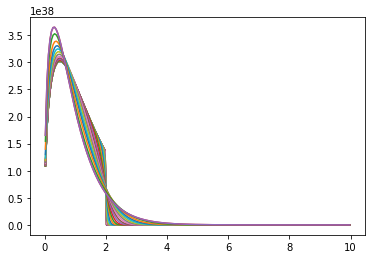

In [39]:
plt.plot(eedf.energy_point_eV, sol.y[:,::40])

In [40]:
eedf.electron_density

7.3603138852286554e+19

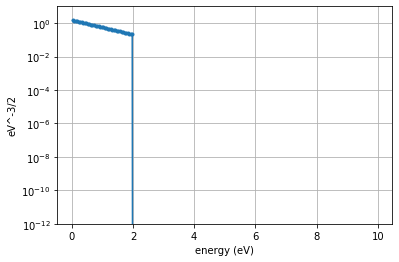

In [41]:
eedf.set_density_per_J(sol.y[:,0])
eedf.plot_normalized_eepf()

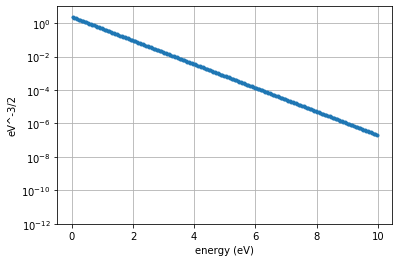

In [42]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf()

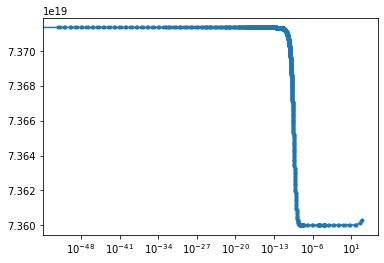

In [43]:
Te_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_density)
plt.semilogx(sol.t, Te_seq, marker='.')

### together all effects

In [44]:
y0 = 1e20 * get_maxwell_eedf(eedf.energy_point, Te_eV=1.0)
sol = solve_ivp(dndt_all, [0,1e3],y0, method="BDF")

0.0
8.773568207309943e-14
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1834482273533983e-14
2.1834482273533983e-14
4.3668964547067965e-14
4.3668964547067965e-14
2.620137872824078e-13
2.620137872824078e-13
4.803586100177477e-13
4.8035861001

2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.882437409389208e-10
2.88243740

0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333
0.03146665099884333


0.7394659842729405
3.9576447718824737
3.9576447718824737
7.175823559492007
7.175823559492007
39.35761143558734
39.35761143558734
71.53939931168267
71.53939931168267
393.35727807263606
393.35727807263606
715.1751568335894
715.1751568335894
1000.0
1000.0


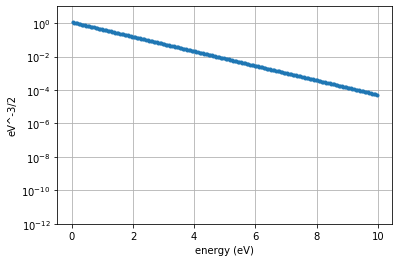

In [45]:
eedf.set_density_per_J(sol.y[:,0])
eedf.plot_normalized_eepf()

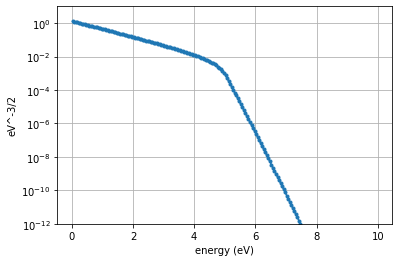

In [46]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf()

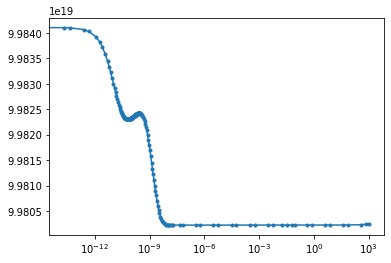

In [47]:
Te_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_density)
plt.semilogx(sol.t, Te_seq, marker='.')